In [19]:
import numpy as np
import matplotlib.pyplot as plt

import adaptivealgo.cli.policy_iter as pi
from adaptivealgo.lib.simulator import Simulator
import adaptivealgo.cli.simulate_policy as sim

In [20]:
n_links = 4
f_thresh = 0.4
actions = [0.1, 0.2, 0.3, 0.4, 0.5]
alpha = 1.0
gamma = 0.2
tol = 1e-6

n_episodes = 10_000

In [21]:
policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
opt_policy: dict = policy["policy"]
print(f"Policy iteration took {i} iterations")

simulator = Simulator(opt_policy, n_links, f_thresh, actions, alpha, gamma)
opt_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime: {int(np.mean(opt_samples))} steps")

Policy iteration took 2 iterations
Mean runtime: 25 steps


In [22]:
random_policy = {s: np.random.randint(0, len(actions)) for s in opt_policy.keys()}
simulator = Simulator(random_policy, n_links, f_thresh, actions, alpha, gamma)
random_samples = sim.gen_policy_samples(simulator, n_episodes)
print(f"Mean runtime for random policy: {int(np.mean(random_samples))} steps")

Mean runtime for random policy: 100 steps


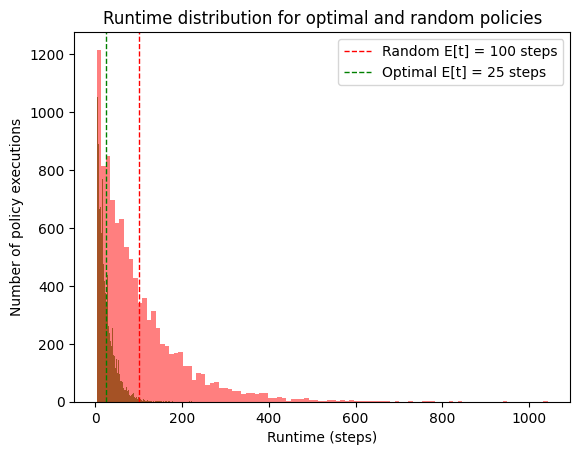

In [23]:
plt.hist(opt_samples, bins=100, color='g', alpha=0.7)
plt.hist(random_samples, bins=100, color='r', alpha=0.5)

plt.axvline(np.mean(random_samples), color='r', linestyle='--', linewidth=1)
plt.axvline(np.mean(opt_samples), color='g', linestyle='--', linewidth=1)

plt.title('Runtime distribution for optimal and random policies')
plt.xlabel('Runtime (steps)')
plt.ylabel('Number of policy executions')

plt.legend([f'Random E[t] = {int(np.mean(random_samples))} steps', f'Optimal E[t] = {int(np.mean(opt_samples))} steps'])
plt.show()

Policy for 2 iteration took 2 iterations
Policy for 3 iteration took 2 iterations
Policy for 4 iteration took 2 iterations
Policy for 5 iteration took 3 iterations


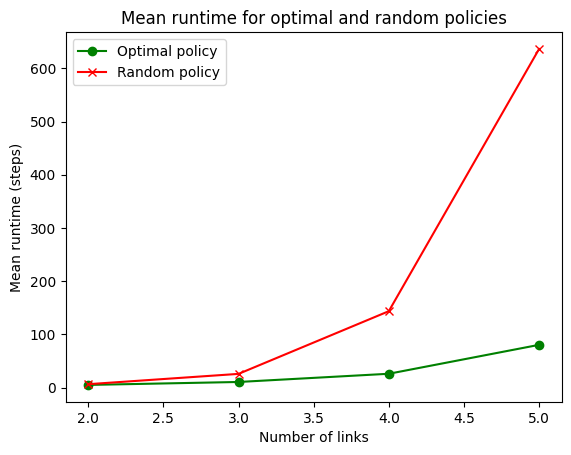

In [24]:
means_opt = []
means_random = []

for n_links in range(2, 6):
    policy, i = pi.find_policy(n_links, f_thresh, actions, alpha, gamma, tol)
    opt_policy: dict = policy["policy"]
    print(f"Policy iteration for {n_links} links took {i} iterations")

    simulator = Simulator(opt_policy, n_links, f_thresh, actions, alpha, gamma)
    opt_samples = sim.gen_policy_samples(simulator, n_episodes)
    means_opt.append(np.mean(opt_samples))

    random_policy = {s: np.random.randint(0, len(actions)) for s in opt_policy.keys()}
    simulator = Simulator(random_policy, n_links, f_thresh, actions, alpha, gamma)
    random_samples = sim.gen_policy_samples(simulator, n_episodes)
    means_random.append(np.mean(random_samples))

plt.plot(range(2, 6), means_opt, color='g', marker='o', label='Optimal policy')
plt.plot(range(2, 6), means_random, color='r', marker='x', label='Random policy')

plt.title('Mean runtime for optimal and random policies')
plt.xlabel('Required number of links')
plt.ylabel('Mean runtime (steps)')
plt.legend()
plt.show()